In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
def read_data(directory):
    data = []
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                file_path = os.path.join(category_path, filename)
                with open(file_path, 'r', encoding='utf-8') as file:
                    text = file.read()
                    data.append((text, category))
    return data

train_data = read_data('data_train/train')
test_data = read_data('data_train/test')

In [24]:
train_df = pd.DataFrame(train_data, columns=['text', 'category'])
test_df = pd.DataFrame(test_data, columns=['text', 'category'])

In [25]:
train_df.tail()

,text,category
29995,2-9 mình đi với nhóm bạn tổng_cộng là 8ng.Thiệ...,pos
29996,sushi bình_dân mà chất_lượng không bình_dân ch...,pos
29997,Trời_ơi từ bé đến lớn chưa thử món kem nào bằn...,pos
29998,Nge mn cũng ns ngon nên hni đến coi thế_nào .\...,pos
29999,Ks đẹp . Thoág mát . Lại gần vs phố cổ nữa nên...,pos


In [26]:
test_df.head()

,text,category
0,Lần đầu_tiên ăn chắc cũng là lần cuối ăn_ở đây...,neg
1,"Khi mình vào thì bàn chưa dọn , dơ kinh . Cái ...",neg
2,Haiz ! Không biết đúng hương_vị của bánh thế_n...,neg
3,Mình ghé quán này vì thấy có cơm theo kiểu Việ...,neg
4,"Quán xịn ở Quan_Hoa - Cầu_Giấy , biển_hiệu màu...",neg


In [27]:
import nltk
current_dir = os.getcwd()
nltk.download('punkt', download_dir=current_dir)
nltk.download('stopwords', download_dir=current_dir)

[nltk_data] Downloading package punkt to d:\learn\NLP\Text sentiment
[nltk_data]     analysis...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to d:\learn\NLP\Text
[nltk_data]     sentiment analysis...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
import underthesea
import re

with open('vietnamese-stopwords.txt',encoding='utf-8') as f:
    stopwords = []
    for line in f:
        stopwords.append("-".join(line.strip().split()))
def remove_multiple_space(text):
    text = re.sub(r'\s+', ' ', text)
    return text

def remove_numeric(text):
    words = text.split()
    text = ' '.join([word for word in words if not word.isdigit()])
    return text

def preprocess_text(text):
    text = remove_multiple_space(text)
    
    text = text.replace('\n', ' ')
    text = text.replace('.', '')
    text = text.replace(',', '')
    text = text.replace('?', '')
    text = text.replace('!', '')
    text = text.replace('/', '')
    text = text.replace('-', '')
    text = text.replace('//', '')
    text = text.replace(':', '')
    text = text.replace('|', '')
    
    text = remove_numeric(text)
    
    text = text.lower()
    
    text = re.sub(r'[^\w\s]', '', text)
    
    tokens = underthesea.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords]
    
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [40]:
train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)
train_df.head()

,text,category,preprocessed_text
0,Mua có mỗi Bingsu thập_cẩm 45k mà mình f đợi h...,neg,mua bingsu thập_cẩm 45 k f đợi nv tl r nhg bảo...
1,Thứ 6 nào ta cùng quẩy 💣 💣 💣\nVuvuzela beer cl...,neg,ta quẩy vuvuzela beer club hệ_thống gogi_house...
2,"Mình đi với nhóm , tổng_cộng 4 người ăn chỉ có...",neg,đi tổng_cộng 150 k no í cá_lóc nướng to thiệt ...
3,"nhân_viên phục_vụ không mấy tận_tình , đồ_ăn r...",neg,nhân_viên phục_vụ mấy tận_tình đồ_ăn món cơm t...
4,"Vào đây thì hết bàn , nhưng mình vẫn ngồi đợi ...",neg,bàn đợi bình_thường nhân_viên dọn bàn ai_ngờ d...


In [41]:
test_df['preprocessed_text'] = test_df['text'].apply(preprocess_text)
test_df.head()

,text,category,preprocessed_text
0,Lần đầu_tiên ăn chắc cũng là lần cuối ăn_ở đây...,neg,đầu_tiên ăn_ở món đặc_sắc giá_cả mắc đồ_ăn nhì...
1,"Khi mình vào thì bàn chưa dọn , dơ kinh . Cái ...",neg,bàn dọn dơ kinh bếp lẩu rỉ sét phục_vụ mặt kg ...
2,Haiz ! Không biết đúng hương_vị của bánh thế_n...,neg,haiz hương_vị bánh thế_nào bánh chỗ ngon giá_c...
3,Mình ghé quán này vì thấy có cơm theo kiểu Việ...,neg,ghé quán cơm kiểu việt giá tạm tuy_nhiên quán ...
4,"Quán xịn ở Quan_Hoa - Cầu_Giấy , biển_hiệu màu...",neg,quán xịn quan_hoa cầu_giấy biển_hiệu màu xanh ...


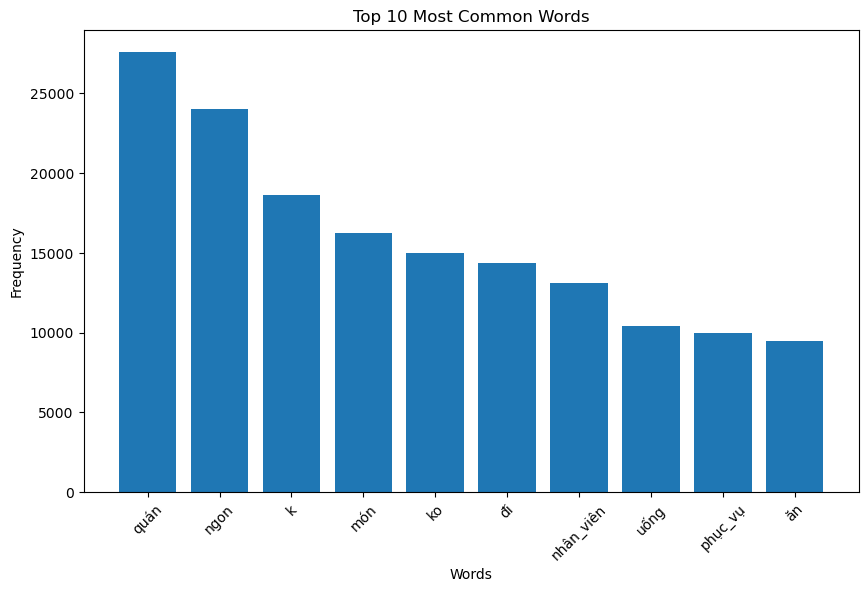

In [43]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_word_frequency(text):
    words = text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(10)
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title('Top 10 Most Common Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequency(train_df['preprocessed_text'].str.cat())


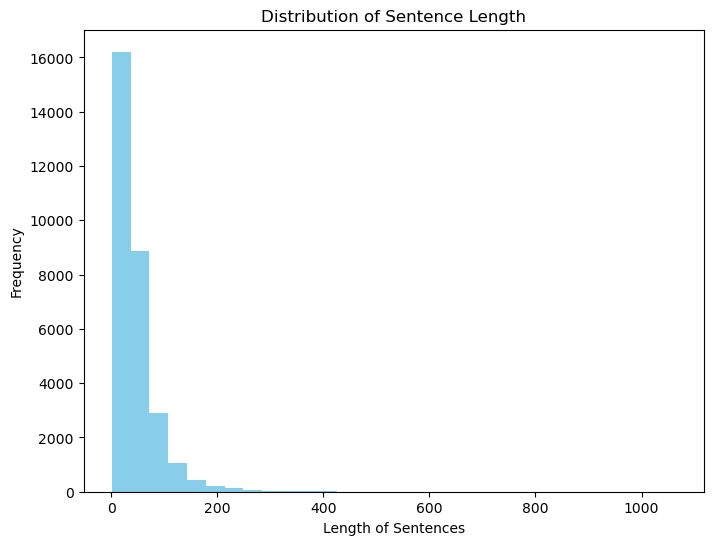

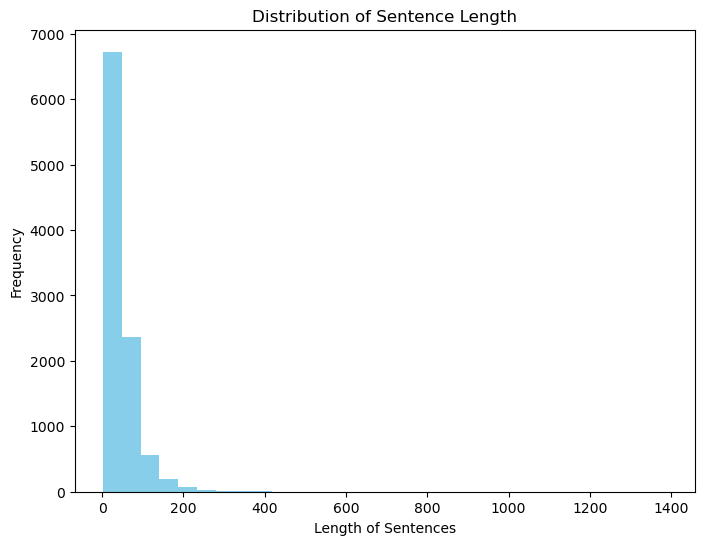

In [45]:
import matplotlib.pyplot as plt

def plot_sentence_length(data):
    sentence_lengths = data.str.split().apply(len)
    plt.figure(figsize=(8, 6))
    plt.hist(sentence_lengths, bins=30, color='skyblue')
    plt.title('Distribution of Sentence Length')
    plt.xlabel('Length of Sentences')
    plt.ylabel('Frequency')
    plt.show()

plot_sentence_length(train_df['preprocessed_text'])

plot_sentence_length(test_df['preprocessed_text'])


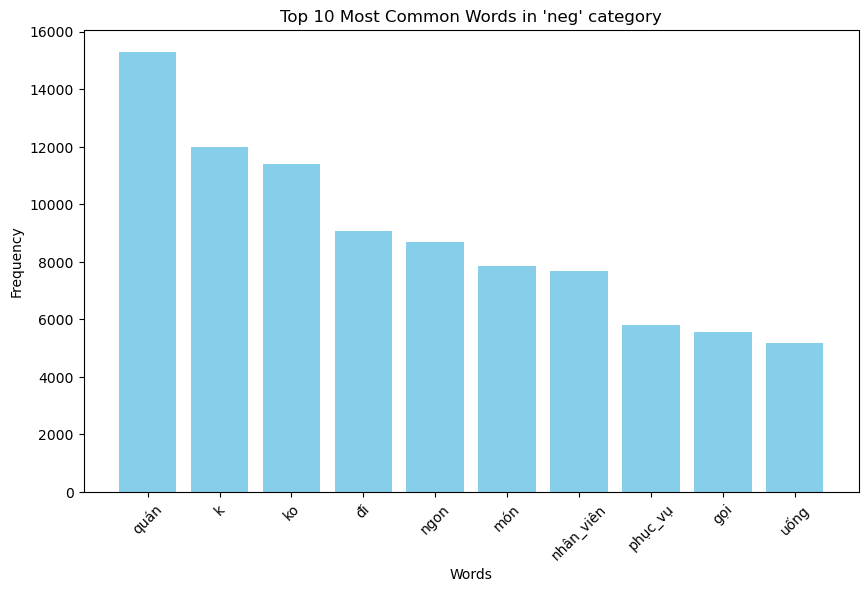

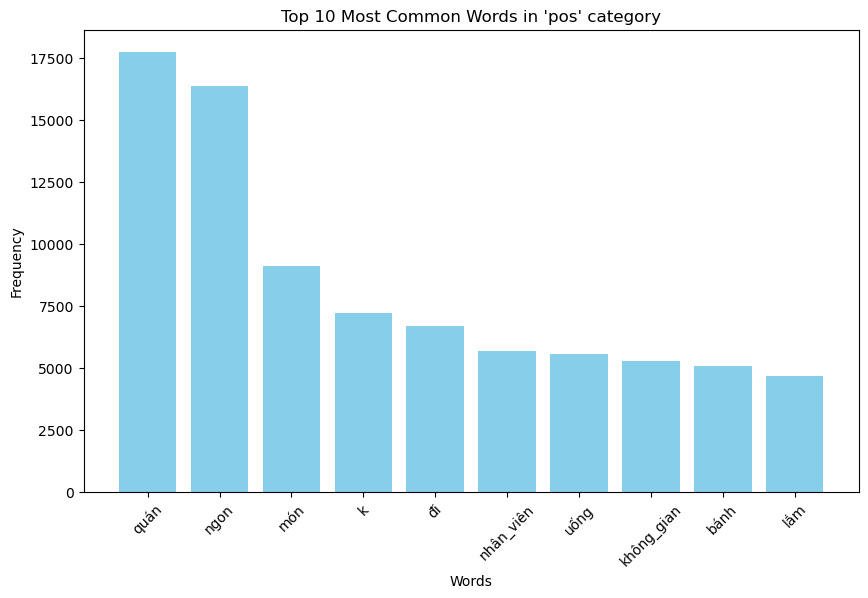

In [46]:
from collections import Counter
import matplotlib.pyplot as plt
def most_common_words_by_label(data, label):
    text = ' '.join(data[data['category'] == label]['preprocessed_text'])
    words = text.split()
    word_counts = Counter(words)
    top_words = word_counts.most_common(10)
    return top_words


def plot_most_common_words(data, label):
    top_words = most_common_words_by_label(data, label)
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(f'Top 10 Most Common Words in \'{label}\' category')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_most_common_words(train_df, 'neg')
plot_most_common_words(train_df, 'pos')



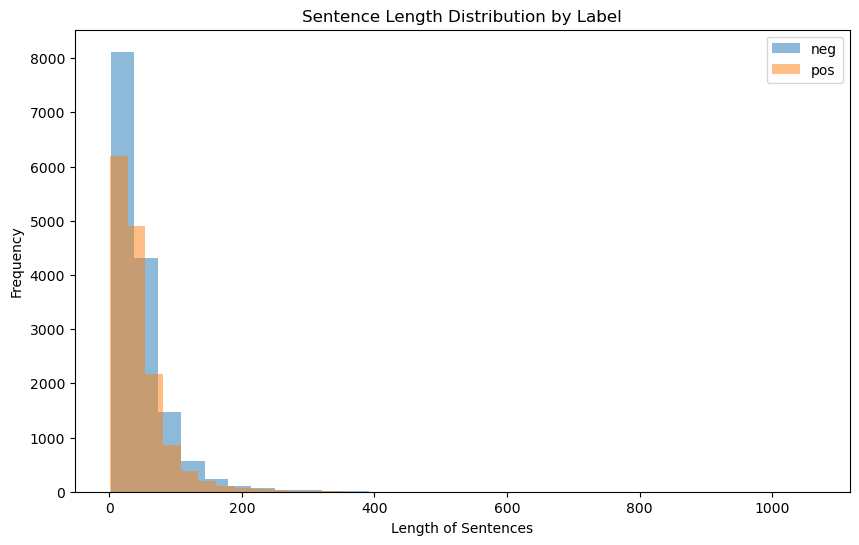

In [53]:
def plot_sentence_length_by_label(data):
    plt.figure(figsize=(10, 6))
    for label in ['neg', 'pos']:
        sentence_lengths = data[data['category'] == label]['preprocessed_text'].str.split().apply(len)
        plt.hist(sentence_lengths, bins=30, alpha=0.5, label=label)
    plt.title('Sentence Length Distribution by Label')
    plt.xlabel('Length of Sentences')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_sentence_length_by_label(train_df)


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [50]:
tfidf_vectorizer = TfidfVectorizer()

pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [51]:
pipeline.fit(train_df['preprocessed_text'], train_df['category'])

predictions = pipeline.predict(test_df['preprocessed_text'])

In [52]:
print("Accuracy:", accuracy_score(test_df['category'], predictions))
print("\nClassification Report:")
print(classification_report(test_df['category'], predictions))

Accuracy: 0.8524

Classification Report:
              precision    recall  f1-score   support

         neg       0.86      0.85      0.85      5000
         pos       0.85      0.86      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

In [55]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True)
nb_model = MultinomialNB()

In [56]:
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('svm', svm_model), ('nb', nb_model)],
    voting='soft' 
)

In [57]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('ensemble', ensemble_model)
])


In [58]:
pipeline.fit(train_df['preprocessed_text'], train_df['category'])

predictions = pipeline.predict(test_df['preprocessed_text'])

In [59]:
print("Accuracy:", accuracy_score(test_df['category'], predictions))
print("\nClassification Report:")
print(classification_report(test_df['category'], predictions))

Accuracy: 0.8741

Classification Report:
              precision    recall  f1-score   support

         neg       0.88      0.86      0.87      5000
         pos       0.86      0.89      0.88      5000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [60]:
import joblib

model_filename = 'ensemble_model.pkl'
joblib.dump(pipeline, model_filename)
print("\nTrained model saved to:", model_filename)


Trained model saved to: ensemble_model.pkl


In [61]:
loaded_model = joblib.load('ensemble_model.pkl')

new_data = ["This restaurant is amazing!", "I did not like the food at all."]
predictions = loaded_model.predict(new_data)

for text, prediction in zip(new_data, predictions):
    print(f"Text: {text} - Predicted Label: {prediction}")

Text: This restaurant is amazing! - Predicted Label: pos
Text: I did not like the food at all. - Predicted Label: neg
